In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
 df = pd.read_csv("21-housing.csv")

In [28]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [33]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [38]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

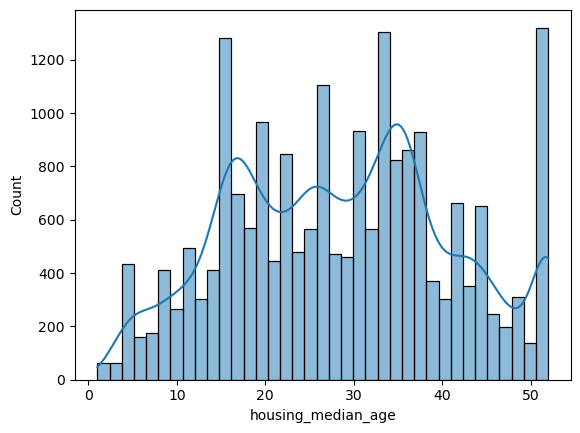

In [40]:
sns.histplot(data=df, x="housing_median_age", kde=True)
plt.show()

In [41]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

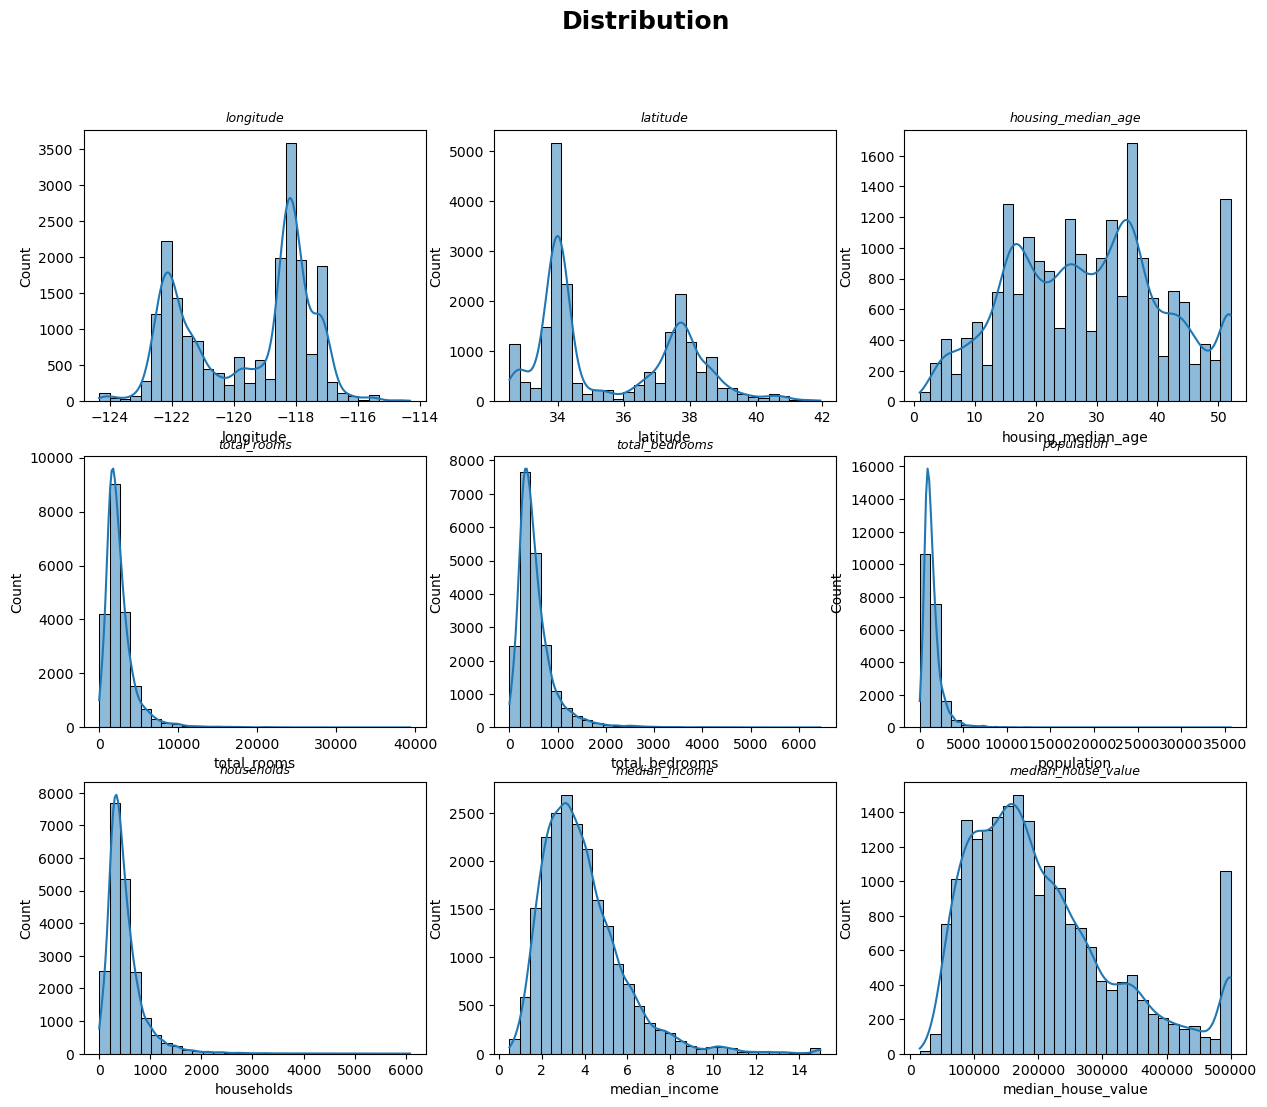

In [44]:
columns= ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
fig, axes= plt.subplots(nrows =3, ncols =3, figsize=(15,12))
fig.suptitle("Distribution", fontsize =18, fontweight="bold")

for i, col in enumerate(columns[:9]):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=9, fontstyle="italic")


# Bu kod, her sütunun dağılımını histogram ve KDE eğrisi ile 3x3'lük alt grafikler halinde görselleştirmek için kullanılır.


In [45]:
df.corr (numeric_only =True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [46]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary ={}

    numeric_cols = df.select_dtypes(include =["float64","int64"]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)# quantile() ->veriyi alır büyükten küçüge sıralar
        Q3 = df[col].quantile(0.75)
        IQR =Q3 - Q1

        lower_bound = Q1 - threshold * IQR # q1 den threshold*ıqr kadar küçük olan degerler artık outlier demek.
        upper_bound = Q3 + threshold * IQR
        #yani burada alt sınır ve üst sınır belirlememizin sebebi
        # q1 den ne kadar küçük degerler için outlier diyelim
        # q3 den ne kadar büyük degerler için outlier diyelim

        outliers = df [(df[col] < lower_bound)| (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0]/ df.shape[0],
            "lower_bound": lower_bound,
            "upper_bound" : upper_bound
            #her satır için tek tek outlier sayısının, yzüdesinin ve upper bound, lower bound yazdırma işlemi.

        }
    return pd.DataFrame(outlier_summary)

In [47]:
find_outliers_iqr(df, threshold=1.5)
# threshold outlierlara gösterilen tolerans katsayısıdır.
#katsayı arttıkça tolerans artar. Outlier miktarı azalır.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [48]:
def remove_outliers_from_column (df, target_col, threshold = 1.5):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR =Q3 - Q1

        lower_bound = Q1 - threshold * IQR 
        upper_bound = Q3 + threshold * IQR
        return  df [(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [49]:
def remove_outliers_from_all_columns(df, threshold = 1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [50]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (17446, 10)


In [58]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [60]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19369.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,539.893335,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,422.650225,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,648.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [62]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19712\3688706348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [64]:
df_target_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [66]:
#one_hot encoding
df_target_clean ["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

In [68]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)

In [70]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [72]:
X = df_target_clean.drop("median_house_value", axis = 1)
y = df_target_clean["median_house_value"]

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [76]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [78]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [80]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [82]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [84]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")
#Farklı regresyon modelleri, aynı eğitim ve test setleri üzerinde eğitilmiş 
#ve MAE, RMSE ve R² metrikleri kullanılarak karşılaştırılmıştır.”

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  59377.105929262376
Mean Absolute Error:  43858.38748241082
R2 Score:  0.6104236470924751
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  58769.54725739199
Mean Absolute Error:  43594.363863007915
R2 Score:  0.6263296157229542
-----------------------------------


Lasso
Model performance for Training Set
Root Mean Squared Error:  59377.14466856273
Mean Absolute Error:  43859.00858534626
R2 Score:  0.6104231387510854
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  58768.462304422465
Mean Absolute Error:  43594.66878006589
R2 Score:  0.6263434123598097
-----------------------------------


Ridge
Model performance for Training Set
Root Mean Squared Error:  59381.16868007146
Mean Absolute Error:  43864.67731493723
R2 Score:  0.6103703334199276
-----------------------------------
Model performance for Test Set
Root Mean Squar

In [ ]:
xgboost_params = {
        "learning_rate" : [0.1, 0.01],
        "max_depth" : [5,8,12,20,30],
        "n_estimators" : [100,200,300,500],
        "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 1]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
randomized_cv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgboost_params, cv = 5, n_jobs = -1)

In [ ]:
randomized_cv.fit(X_train, y_train)

In [ ]:
randomized_cv.best_params_

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")